In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

## Learning Rate Decay

[Setting the learning rate of your neural network.](https://www.jeremyjordan.me/nn-learning-rate/)

In [8]:
def f(x, a = 1):
    return 0.5*a*x*x +0.05*x*x*x

def grad_f(x, a=1):
    return a*x +0.05/3*x*x

In [23]:
x  = 2
a=13/3.0
xs = np.linspace(-4,4,200)
a=13/3.0
ys = f(xs,a)
fig, ax = plt.subplots(1,3,figsize=(24,8))

ys = f(xs,a)
etas = [0.1, 0.2, 0.48]
for k in range(len(etas)):
    x=2
    ax[k].plot(xs,ys)
    ax[k].scatter([x], [f(x,a)],facecolor='green', s=100)
 
    for i in  range(7):
        x_next= x - etas[k]*grad_f(x,a)
        ax[k].plot([x, x_next], [f(x,a),f(x_next,a)],c='red')
        x= x_next
        ax[k].scatter([x], [f(x,a)],c='red')            
plt.close()

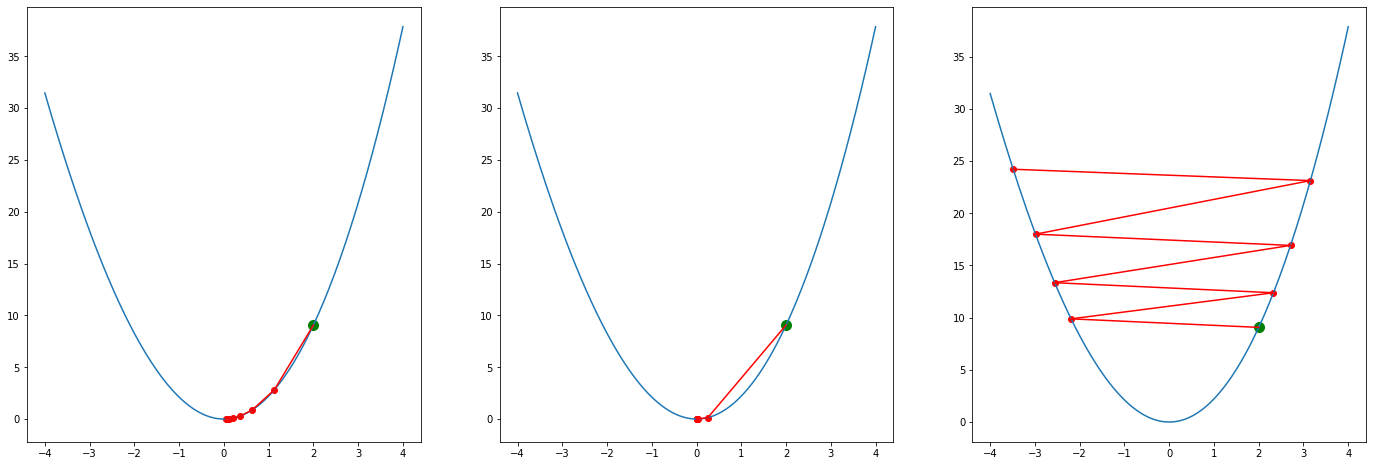

In [10]:
fig

In [11]:
t = torch.FloatTensor([0])
t.requires_grad_(True)

tensor([0.], requires_grad=True)

In [12]:
sgd = torch.optim.SGD([{'params': [t],'initial_lr':0.1, 'lr':0.05}])
scheduler = torch.optim.lr_scheduler.StepLR(sgd,4,gamma=0.5)

In [13]:
sgd.param_groups[0]

{'params': [tensor([0.], requires_grad=True)],
 'initial_lr': 0.1,
 'lr': 0.1,
 'momentum': 0,
 'dampening': 0,
 'weight_decay': 0,
 'nesterov': False}

In [14]:
lrs = []
for e in range(40):
    sgd.zero_grad()
    sgd.step()
    lrs.append( sgd.param_groups[0]['lr'])
    scheduler.step()

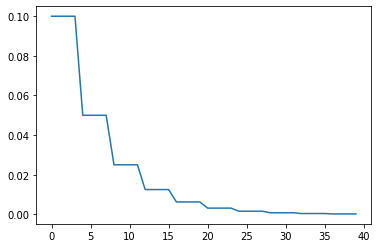

In [15]:
plt.plot(lrs);

In [16]:
def decay(sched, n_epochs):
    lrs = []
    for e in range(n_epochs):
        sgd.zero_grad()
        sgd.step()
        lrs.append( sgd.param_groups[0]['lr'])
        sched.step()
    return lrs    

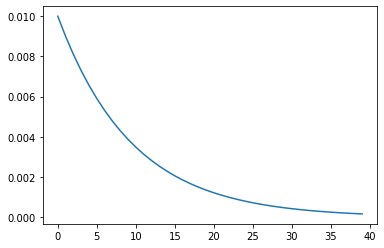

In [17]:
sgd = torch.optim.SGD([{'params': [t],'initial_lr':0.01, 'lr':0.05}])
scheduler =  torch.optim.lr_scheduler.ExponentialLR(sgd,gamma=0.9)
lrs = decay(scheduler,40)
plt.plot(lrs);

[SGDR: Stochastic Gradient Descent with Warm Restarts](https://arxiv.org/abs/1608.03983)

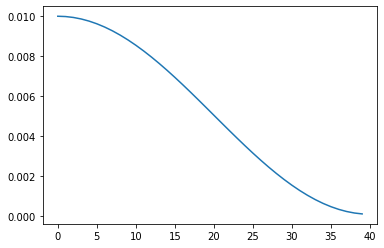

In [18]:
sgd = torch.optim.SGD([{'params': [t],'initial_lr':0.01, 'lr':0.05}])
scheduler =  torch.optim.lr_scheduler.CosineAnnealingLR(sgd,40,eta_min=0.0001)
lrs = decay(scheduler,40)
plt.plot(lrs);

[SGDR: Stochastic Gradient Descent with Warm Restarts](https://arxiv.org/abs/1608.03983)

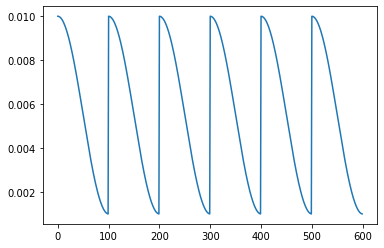

In [21]:
sgd = torch.optim.SGD([{'params': [t],'initial_lr':0.01, 'lr':0.05}])
scheduler =  torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(sgd, 100, T_mult=1, eta_min=0.001)
lrs = decay(scheduler,600)
plt.plot(lrs);

[Cyclical Learning Rates for Training Neural Networks](https://arxiv.org/abs/1506.01186)

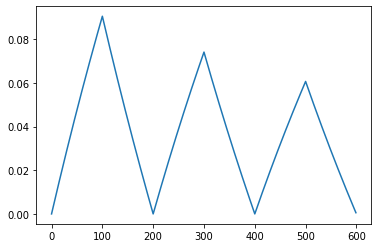

In [19]:
sgd = torch.optim.SGD([{'params': [t],'initial_lr':0.0001, 'lr':0.05}])
scheduler =  torch.optim.lr_scheduler.CyclicLR(sgd, 0.0001, 0.1, step_size_up=100, step_size_down=100, mode='exp_range', gamma=0.999)
lrs = decay(scheduler,600)
plt.plot(lrs);

[Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates](https://arxiv.org/abs/1708.07120)

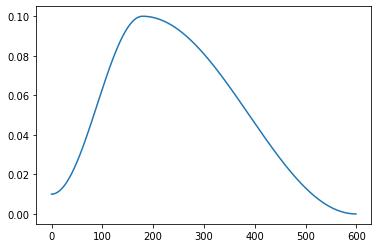

In [20]:
sgd = torch.optim.SGD([{'params': [t],'initial_lr':0.01, 'lr':0.05}])
scheduler =  torch.optim.lr_scheduler.OneCycleLR(sgd,  0.1, total_steps=600, anneal_strategy='cos')
lrs = decay(scheduler,600)
plt.plot(lrs);